In [ ]:
import datetime
import math

In [54]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

In [136]:
df = pd.read_csv('raw data.csv', index_col=[0])

In [137]:
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [138]:
# create a copy of the dataframe so the excel file doesn't have to be read again
df_copy = df.copy()

# Data Discovery

- 541,909 rows
- 4,372 Unique CustomerID values
- 25,900 Unique InvoiceNo values
- 4,070 Unique StockCode values
- 38,970 max unit price
- 0.03 min unit price
- 9,287 returns
- date range is (2010-12-01 to 2011-12-09)
- 11,481 items are returns

In [139]:
df = df[df['InvoiceDate'] <= '2011-12-01 23:59:59']

In [140]:
df[df.StockCode == 'B']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [141]:
df = df[df.StockCode != 'B']

A few items that are less than 0.01 and the quantity doesn't bring them to 0.01 will also be dropped

In [142]:
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [1]:
df[df['TotalRevenue'] < .01].head(2)

NameError: name 'df' is not defined

### Creating a dataframe of customers, their total revenue, number of invoices during the timeframe and time since last purchase

In [144]:
# grouped_customers = df.groupby(['CustomerID', 'InvoiceNo']).sum()

In [145]:
invoice_count = df.groupby(['CustomerID'], as_index=False)['InvoiceNo'].count()[1]

KeyError: 1

In [146]:
invoice_count.head(2)

,CustomerID,frequency
0,12346.0,2
1,12347.0,171


In [147]:
invoice_count.rename(columns={'Frequency': 'frequency'}, inplace=True)

In [148]:
invoice_count.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,171
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [149]:
customer_total_revenue = df.groupby(['CustomerID'], as_index=False)['TotalRevenue'].sum()

In [150]:
customer_total_revenue.rename(columns={'TotalRevenue': 'monetary'}, inplace=True)

In [151]:
customer_total_revenue.head()

,CustomerID,monetary
0,12346.0,0.00
1,12347.0,4085.18
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [152]:
customer_total_revenue.monetary = round(customer_total_revenue.monetary, 2)

In [153]:
customer_total_revenue_invoice_count = customer_total_revenue.merge(invoice_count, on='CustomerID', sort=True)

In [154]:
customer_total_revenue_invoice_count.head()

,CustomerID,monetary,frequency
0,12346.0,0.00,2
1,12347.0,4085.18,171
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [155]:
#  customer_total_revenue_invoice_count = customer_total_revenue_invoice_count[customer_total_revenue_invoice_count['TotalRevenue'] > 0]

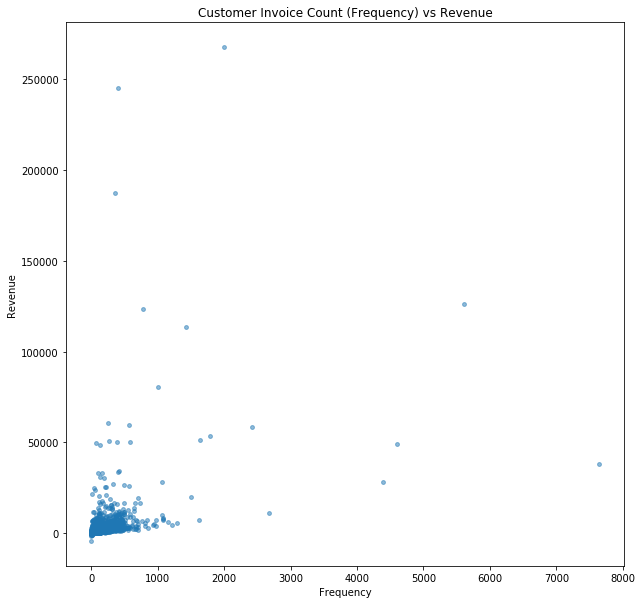

In [156]:
plt.figure(figsize=(10,10))
plt.scatter(customer_total_revenue_invoice_count.frequency, customer_total_revenue_invoice_count.monetary, s=15, alpha=0.5)
plt.title('Customer Invoice Count (Frequency) vs Revenue')
plt.xlabel('Frequency')
plt.ylabel('Revenue')
plt.show()


Creating a column in the original dataframe that marks how long ago from the last possibe date an item was puchased

In [157]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [158]:
df['DaysSincePurchase'] = df['InvoiceDate'].max() - df['InvoiceDate']

In [159]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,DaysSincePurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,365 days 11:28:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,365 days 11:28:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,365 days 11:28:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,365 days 11:28:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,365 days 11:28:00


Identifying the most recent purchase and setting that in a new dataframe, then merging that into the rest of the data

In [160]:
customer_since_purchase = df.groupby(['CustomerID'], as_index=False)['DaysSincePurchase'].min()

In [161]:
customer_total_revenue_invoice_count_since_purchase = customer_total_revenue_invoice_count.merge(customer_since_purchase, on='CustomerID', sort=True)

In [162]:
customer_total_revenue_invoice_count_since_purchase.rename(columns={'DaysSincePurchase': 'recency'}, inplace=True)


DaysSinceLastPurchase is timedelta64, in order to make it work for creating plots, it has to be made into an integer

In [168]:
RecentPurchase = customer_since_purchase['DaysSincePurchase']

RecentPurchaseDays = [None] * len(RecentPurchase)

for i in range(len(RecentPurchase)):
    RecentPurchaseDays[i] = RecentPurchase[i].days

customer_total_revenue_invoice_count_since_purchase['recency'] = RecentPurchaseDays

# customer_total_revenue_invoice_count_since_purchase.drop('DaysSincePurchase', axis=1, inplace = True)

customer_total_revenue_invoice_count_since_purchase.head(2)

,CustomerID,monetary,frequency,recency
0,12346.0,0.00,2,317
1,12347.0,4085.18,171,31


In [134]:
customer_total_revenue_invoice_count_since_purchase

,monetary,frequency,recency
CustomerID,,,
12346.0,0.10,2,317 days 09:37:00
12347.0,4085.18,171,31 days 07:29:00
12348.0,1797.24,31,67 days 06:41:00
12349.0,1757.55,73,10 days 10:03:00
12350.0,334.40,17,302 days 03:53:00
12352.0,1545.41,95,28 days 05:17:00
12353.0,89.00,4,196 days 02:07:00
12354.0,1079.40,58,224 days 06:43:00
12355.0,459.40,13,206 days 06:05:00


In [76]:
customer_total_revenue_invoice_count_since_purchase.set_index('CustomerID', inplace = True)

In [87]:
monetary = customer_total_revenue_invoice_count_since_purchase.monetary

In [100]:
customer_total_revenue_invoice_count_since_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4334 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
monetary     4334 non-null float64
frequency    4334 non-null int64
recency      4334 non-null timedelta64[ns]
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 295.4 KB


In [102]:
customer_total_revenue_invoice_count_since_purchase['monetary'] == 0

CustomerID
12346.0     True
12347.0    False
12348.0    False
12349.0    False
12350.0    False
12352.0    False
12353.0    False
12354.0    False
12355.0    False
12356.0    False
12357.0    False
12358.0    False
12359.0    False
12360.0    False
12361.0    False
12362.0    False
12363.0    False
12364.0    False
12365.0    False
12370.0    False
12371.0    False
12372.0    False
12373.0    False
12374.0    False
12375.0    False
12377.0    False
12378.0    False
12379.0    False
12380.0    False
12381.0    False
           ...  
18245.0    False
18246.0    False
18248.0    False
18249.0    False
18250.0    False
18251.0    False
18252.0    False
18255.0    False
18256.0    False
18257.0    False
18259.0    False
18260.0    False
18261.0    False
18262.0    False
18263.0    False
18265.0    False
18268.0     True
18269.0    False
18270.0    False
18272.0    False
18273.0    False
18274.0     True
18276.0    False
18277.0    False
18278.0    False
18280.0    False
18281.0    False
182

In [116]:
customer_total_revenue_invoice_count_since_purchase['monetary'] = customer_total_revenue_invoice_count_since_purchase['monetary'].apply(lambda x: 0.1 if x <= 0 else x)

In [117]:
customer_total_revenue_invoice_count_since_purchase.head(2)

,monetary,frequency,recency
CustomerID,,,
12346.0,0.10,2,317 days 09:37:00
12347.0,4085.18,171,31 days 07:29:00


In [90]:
i

0

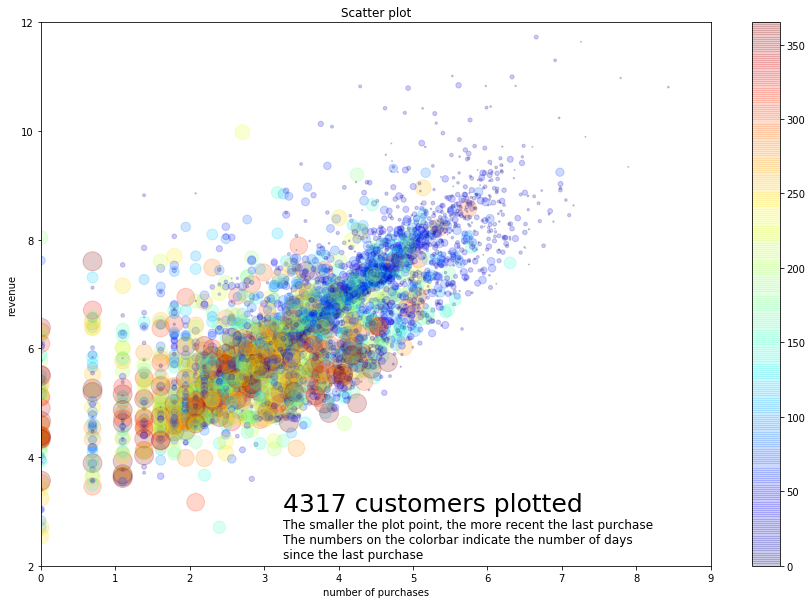

In [120]:
fit = np.polyfit(np.log(customer_total_revenue_invoice_count_since_purchase.frequency),
                 np.log(customer_total_revenue_invoice_count_since_purchase.monetary),1)
fit_fn = np.poly1d(fit) 

plt.figure(figsize=(15,10))
plt.scatter(np.log(customer_total_revenue_invoice_count_since_purchase.frequency), 
            np.log(customer_total_revenue_invoice_count_since_purchase.monetary), 
            s=RecentPurchaseDays, alpha=0.2, c=RecentPurchaseDays,cmap="jet")
plt.plot(np.log(customer_total_revenue_invoice_count_since_purchase.frequency), fit_fn(np.log(customer_total_revenue_invoice_count_since_purchase.monetary)), 'red')
plt.title('Scatter plot')
plt.xlabel('number of purchases')
plt.ylabel('revenue')
plt.xlim(0,9)
plt.ylim(2,12)
plt.colorbar()
plt.text(3.25, 3, '4317 customers plotted', fontsize=25)
plt.text(3.25, 2.15, 'The smaller the plot point, the more recent the last purchase\nThe numbers on the colorbar indicate the number of days\nsince the last purchase', fontsize=12)
plt.show()
plt.close()


Creating a loop to make an animated gif of the plot to better understand it

In [ ]:
# i = 4317
for i in range(1, len(customer_total_revenue_invoice_count_since_purchase)):
    if i % 25 == 0 or i == 4317:
        fit = np.polyfit(np.log(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i]),np.log(customer_total_revenue_invoice_count_since_purchase.TotalRevenue[0:i]),1)
        fit_fn = np.poly1d(fit) 

        plt.figure(figsize=(15,10))
        plt.scatter(np.log(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i]), 
                    np.log(customer_total_revenue_invoice_count_since_purchase.TotalRevenue[0:i]), 
                    s=RecentPurchaseDays[0:i], alpha=0.2, c=RecentPurchaseDays[0:i],cmap="jet")
        plt.plot(np.log(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i]), fit_fn(np.log(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i])), 'red')
        plt.title('Scatter plot')
        plt.xlabel('number of purchases')
        plt.ylabel('revenue')
        plt.xlim(0,9)
        plt.ylim(2,12)
        plt.colorbar()
        plt.text(3.25, 3, str(i) + ' observations', fontsize=25)
        plt.text(3.25, 2.15, 'The larger the plot point, the more recent the last purchase\nThe numbers on the colorbar indicate the number of days\nfrom the start to the last purchase made', fontsize=12)
        plt.savefig('log_img/' + str(i) + '.png')
        plt.close()


In [ ]:
i = 4317
fit = np.polyfit(np.log(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i]),np.log(customer_total_revenue_invoice_count_since_purchase.TotalRevenue[0:i]),1)
fit_fn = np.poly1d(fit) 

plt.figure(figsize=(15,10))
plt.scatter(np.log(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i]), 
            np.log(customer_total_revenue_invoice_count_since_purchase.TotalRevenue[0:i]), 
            s=RecentPurchaseDays[0:i], alpha=0.2, c=RecentPurchaseDays[0:i],cmap="jet")
plt.plot(np.log(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i]), fit_fn(np.log(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i])), 'red')
plt.title('Scatter plot')
plt.xlabel('number of purchases')
plt.ylabel('revenue')
plt.xlim(0,9)
plt.ylim(2,12)
plt.colorbar()
plt.text(3.25, 3, str(i) + ' observations', fontsize=25)
plt.text(3.25, 2.15, 'The larger the plot point, the more recent the last purchase\nThe numbers on the colorbar indicate the number of days\nfrom the start to the last purchase made', fontsize=12)
plt.savefig('log_img/' + str(i) + '.png')
plt.close()


In [ ]:
# i = 4317
for i in range(1, len(customer_total_revenue_invoice_count_since_purchase)):
    if i % 25 == 0 or i == 4317:
        fit = np.polyfit(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i],customer_total_revenue_invoice_count_since_purchase.TotalRevenue[0:i],1)
        fit_fn = np.poly1d(fit) 

        plt.figure(figsize=(15,10))
        plt.scatter(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i], 
                    customer_total_revenue_invoice_count_since_purchase.TotalRevenue[0:i], 
                    s=RecentPurchaseDays[0:i], alpha=0.2, c=RecentPurchaseDays[0:i],cmap="jet")
        plt.plot(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i], fit_fn(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i]), 'red')
        plt.title('Scatter plot')
        plt.xlabel('number of purchases')
        plt.ylabel('revenue')
        plt.xlim(0,8000)
        plt.ylim(0,200000)
        plt.text(3000, 26000, str(i) + ' observations', fontsize=25)
        plt.text(3000, 9000, 'The larger the plot point, the more recent the last purchase\nThe numbers on the colorbar indicate the number of days\nfrom the start to the last purchase made', fontsize=12)
        plt.colorbar()
        plt.savefig('non_log_img/' + str(i) + '.png')
        plt.close()


i = 4317
fit = np.polyfit(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i],customer_total_revenue_invoice_count_since_purchase.TotalRevenue[0:i],1)
fit_fn = np.poly1d(fit) 

plt.figure(figsize=(15,10))
plt.scatter(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i], 
            customer_total_revenue_invoice_count_since_purchase.TotalRevenue[0:i], 
            s=RecentPurchaseDays[0:i], alpha=0.2, c=RecentPurchaseDays[0:i],cmap="jet")
plt.plot(np.log(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i]), fit_fn(np.log(customer_total_revenue_invoice_count_since_purchase.InvoiceNo[0:i])), 'red')
plt.title('Scatter plot')
plt.xlabel('number of purchases')
plt.ylabel('revenue')
plt.colorbar()
plt.xlim(0,8000)
plt.ylim(0,200000)
plt.text(3000, 26000, str(i) + ' observations', fontsize=25)
plt.text(3000, 9000, 'The larger the plot point, the more recent the last purchase\nThe numbers on the colorbar indicate the number of days\nfrom the start to the last purchase made', fontsize=12)
plt.savefig('non_log_img/' + str(i) + '.png')
plt.close()


In [ ]:
customer_total_revenue_invoice_count_since_purchase['SinceLastPurchase'] = RecentPurchaseDays

In [ ]:
customer_total_revenue_invoice_count_since_purchase.head(5)

In [126]:
customer_total_revenue_invoice_count_since_purchase.reset_index()['CustomerID']

0       12346.0
1       12347.0
2       12348.0
3       12349.0
4       12350.0
5       12352.0
6       12353.0
7       12354.0
8       12355.0
9       12356.0
10      12357.0
11      12358.0
12      12359.0
13      12360.0
14      12361.0
15      12362.0
16      12363.0
17      12364.0
18      12365.0
19      12370.0
20      12371.0
21      12372.0
22      12373.0
23      12374.0
24      12375.0
25      12377.0
26      12378.0
27      12379.0
28      12380.0
29      12381.0
         ...   
4304    18245.0
4305    18246.0
4306    18248.0
4307    18249.0
4308    18250.0
4309    18251.0
4310    18252.0
4311    18255.0
4312    18256.0
4313    18257.0
4314    18259.0
4315    18260.0
4316    18261.0
4317    18262.0
4318    18263.0
4319    18265.0
4320    18268.0
4321    18269.0
4322    18270.0
4323    18272.0
4324    18273.0
4325    18274.0
4326    18276.0
4327    18277.0
4328    18278.0
4329    18280.0
4330    18281.0
4331    18282.0
4332    18283.0
4333    18287.0
Name: CustomerID, Length

In [128]:
log_features = pd.DataFrame()

log_features['monetary'] = np.log(customer_total_revenue_invoice_count_since_purchase['monetary'])


In [131]:
log_features['frequency'] = np.log(customer_total_revenue_invoice_count_since_purchase['frequency'])

In [133]:
customer_total_revenue_invoice_count_since_purchase['recency']

CustomerID
12346.0   317 days 09:37:00
12347.0    31 days 07:29:00
12348.0    67 days 06:41:00
12349.0    10 days 10:03:00
12350.0   302 days 03:53:00
12352.0    28 days 05:17:00
12353.0   196 days 02:07:00
12354.0   224 days 06:43:00
12355.0   206 days 06:05:00
12356.0    14 days 11:14:00
12357.0    25 days 03:47:00
12358.0   142 days 09:50:00
12359.0    49 days 07:07:00
12360.0    44 days 04:32:00
12361.0   279 days 06:03:00
12362.0     3 days 04:59:00
12363.0   101 days 09:36:00
12364.0    32 days 04:11:00
12365.0   283 days 05:50:00
12370.0    43 days 05:03:00
12371.0    36 days 09:38:00
12372.0    63 days 07:42:00
12373.0   303 days 06:44:00
12374.0    17 days 04:17:00
12375.0     2 days 09:18:00
12377.0   307 days 04:09:00
12378.0   121 days 09:20:00
12379.0    73 days 09:45:00
12380.0    13 days 08:27:00
12381.0    25 days 06:18:00
                 ...       
18245.0   141 days 05:25:00
18246.0    15 days 08:05:00
18248.0   105 days 13:40:00
18249.0     9 days 04:47:00
18250.0  

In [169]:
log_features['recency'] = np.log(customer_total_revenue_invoice_count_since_purchase['recency'])


/Users/robblatt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [170]:
customer_total_revenue_invoice_count_since_purchase['recency'] = customer_total_revenue_invoice_count_since_purchase['recency'].apply(lambda x: 0.1 if x <= 0 else x)

In [175]:
customers = customer_total_revenue_invoice_count_since_purchase.reset_index()['CustomerID']

In [179]:
log_features = log_features.set_index(customers)


In [180]:
log_features

,monetary,frequency,recency
CustomerID,,,
12346.0,-2.302585,0.693147,NaN
12347.0,8.315121,5.141664,NaN
12348.0,7.494007,3.433987,NaN
12349.0,7.471676,4.290459,NaN
12350.0,5.812338,2.833213,NaN
12352.0,7.343045,4.553877,NaN
12353.0,4.488636,1.386294,NaN
12354.0,6.984161,4.060443,NaN
12355.0,6.129921,2.564949,NaN


# There are a series of purchases with no customer number

In [ ]:
df_no_customer = df[df['CustomerID'].isna()]

In [ ]:
df_no_customer.head(2)

### Grouping the invoices without customers into a separate dataframe to better understand the data

This is simply to explore the data, since customers are a part of our target, this data has to be set aside.

In [ ]:
no_customer_quantity = df_no_customer.groupby(['InvoiceNo'], as_index=False)['Quantity'].sum()

In [ ]:
no_customer_revenue = df_no_customer.groupby(['InvoiceNo'], as_index=False)['TotalRevenue'].sum()

In [ ]:
no_customer_revenue.describe()

In [ ]:
no_customer_df_by_invoice = no_customer_quantity.merge(no_customer_revenue, on='InvoiceNo', sort=True)

In [ ]:
no_customer_df_by_invoice.head()

In [ ]:
len(no_customer_df_by_invoice)

In [ ]:
    plt.figure(figsize=(12,12))
    plt.scatter(np.log(no_customer_df_by_invoice.Quantity), 
                np.log(no_customer_df_by_invoice.TotalRevenue))
#     plt.title('Non-log transformed')
    plt.xlabel('quantity')
    plt.ylabel('revenue')
#     plt.xlim(0,8000)
#     plt.ylim(0,30000)
#     plt.text(4000, 1000, str(i) + ' observations', fontsize=60)
    plt.show()
#     plt.close()

# Clustering

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
np.random.seed(0)

In [ ]:
customer_total_revenue_invoice_count_since_purchase.drop('DaysSincePurchase', inplace=True, axis = 1)

In [ ]:
agg_clust = AgglomerativeClustering(n_clusters=5)
agg_clust
assigned_clust = agg_clust.fit_predict(customer_total_revenue_invoice_count_since_purchase)
plt.scatter(customer_total_revenue_invoice_count_since_purchase.InvoiceNo, customer_total_revenue_invoice_count_since_purchase.TotalRevenue, c = assigned_clust, s = 10);

In [ ]:
customer_total_revenue_invoice_count_since_purchase.head(2)

In [ ]:
log_customer_total_revenue_invoice_count_since_purchase = customer_total_revenue_invoice_count_since_purchase.copy()

In [ ]:
log_customer_total_revenue_invoice_count_since_purchase.TotalRevenue = np.log(log_customer_total_revenue_invoice_count_since_purchase.TotalRevenue)

In [ ]:
log_customer_total_revenue_invoice_count_since_purchase.InvoiceNo = np.log(log_customer_total_revenue_invoice_count_since_purchase.InvoiceNo)

In [ ]:
#  log_customer_total_revenue_invoice_count_since_purchase.SinceLastPurchase = np.log(log_customer_total_revenue_invoice_count_since_purchase.SinceLastPurchase)

In [ ]:
log_customer_total_revenue_invoice_count_since_purchase.head(2)

In [ ]:
log_customer_total_revenue_invoice_count_since_purchase_2 = log_customer_total_revenue_invoice_count_since_purchase.copy()

In [ ]:
log_customer_total_revenue_invoice_count_since_purchase_2.drop('SinceLastPurchase', axis=1, inplace=True)

In [ ]:
agg_clust = AgglomerativeClustering(n_clusters=10)
agg_clust
assigned_clust = agg_clust.fit_predict(log_customer_total_revenue_invoice_count_since_purchase_2)
plt.scatter(log_customer_total_revenue_invoice_count_since_purchase_2.InvoiceNo, log_customer_total_revenue_invoice_count_since_purchase_2.TotalRevenue, c = assigned_clust, s = 10);

In [ ]:
log_customer_total_revenue_invoice_count_since_purchase.set_index('CustomerID', inplace=True)

In [ ]:
agg_clust = AgglomerativeClustering(n_clusters=10)
agg_clust
assigned_clust = agg_clust.fit_predict(log_customer_total_revenue_invoice_count_since_purchase_2)
plt.figure(figsize=(8,10))
plt.scatter(log_customer_total_revenue_invoice_count_since_purchase_2.InvoiceNo, log_customer_total_revenue_invoice_count_since_purchase_2.TotalRevenue, c = assigned_clust, s = 10);

In [ ]:
log_customer_total_revenue_invoice_count_since_purchase_2.head()

In [ ]:
!pip install plot_agglomerative_agorithm

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward


In [ ]:
X = log_customer_total_revenue_invoice_count_since_purchase_2

In [ ]:
linkage_array = ward(X)

# use the ward() function
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [16, 16], '--', c='k')
ax.plot(bounds, [9, 9], '--', c='k')
ax.text(bounds[1], 16, ' 2 clusters', va='center', fontdict={'size': 12})
ax.text(bounds[1], 9, ' 3 clusters', va='center', fontdict={'size': 12})
plt.xlabel("Data index")
plt.ylabel("Cluster distance")

In [ ]:
agg_comp = AgglomerativeClustering(linkage ="complete", n_clusters=6)
agg_avg = AgglomerativeClustering(linkage ="average", n_clusters=6)
agg_ward = AgglomerativeClustering(linkage ="ward", n_clusters=6)

as_comp = agg_comp.fit_predict(X)
as_avg = agg_avg.fit_predict(X)
as_ward = agg_ward.fit_predict(X)

In [ ]:
plt.scatter(X.InvoiceNo, X.TotalRevenue, c = as_comp, s = 10);

In [ ]:
plt.scatter(X.InvoiceNo, X.TotalRevenue, c = as_avg, s = 10);

In [ ]:
plt.scatter(X.InvoiceNo, X.TotalRevenue, c = as_ward, s = 10);

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
plt.xlabel("Sample index")
plt.ylabel("Cluster distance");

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
dendrogram(linkage_array,  truncate_mode='lastp', p=10)
plt.xlabel('cluster size')
plt.ylabel('distance')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 6)
k_means.fit(X)
y_hat = k_means.predict(X)

plt.scatter(X.InvoiceNo, X.TotalRevenue, c = y_hat, s = 10)
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=40);

In [ ]:
labels_kmeans = k_means.labels_
labels_comp = agg_comp.labels_
labels_avg = agg_avg.labels_
labels_ward = agg_ward.labels_

In [ ]:
cl_centers

In [ ]:
labels_kmeans

In [ ]:
X